In [1]:
# linear algebra
import numpy as np 
import time, datetime
# data processing
import pandas as pd 
import json
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

import boto3
import time, datetime

# **Getting the Data**

In [2]:
import pandas as pd
import boto3
import io

train_file_key = 'ml/training_data/train.csv'
test_file_key = 'ml/training_data/test.csv'
bucket = 'swire-datalake-dev-bucket'

s3 = boto3.client('s3')
train_obj = s3.get_object(Bucket=bucket, Key=train_file_key)
test_obj = s3.get_object(Bucket=bucket, Key=test_file_key)

train_df = pd.read_csv(io.BytesIO(train_obj['Body'].read()))
test_df = pd.read_csv(io.BytesIO(test_obj['Body'].read()))

train_df
test_df

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

# **Data Exploration/Analysis**

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**The training-set has 891 examples and 11 features + the target variable (survived)**. 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

    survival:	Survival
    PassengerId: Unique Id of a passenger.
    pclass:	Ticket class	
    sex:	Sex	
    Age:	Age in years	
    sibsp:	# of siblings / spouses aboard the Titanic	
    parch:	# of parents / children aboard the Titanic	
    ticket:	Ticket number	
    fare:	Passenger fare	
    cabin:	Cabin number	
    embarked:	Port of Embarkation

In [4]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Above we can see that **38% out of the training-set survived the Titanic**. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the 'Age' feature.

In [5]:
train_df.head(15)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S

From the table above, we can note a few things. First of all, that we **need to convert a lot of features into numeric** ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the **features have widely different ranges**, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

**Let's take a more detailed look at what data is actually missing:**

In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Total     %
Cabin       687  77.1
Age         177  19.9
Embarked      2   0.2
Fare          0   0.0
Ticket        0   0.0

The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the 'Age' feature, which has 177 missing values. The 'Cabin' feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Above you can see the 11 features + the target variable (survived). **What features could contribute to a high survival rate ?** 

To me it would make sense if everything except 'PassengerId', 'Ticket' and 'Name'  would be correlated with a high survival rate. 

**1. Age and Sex:**

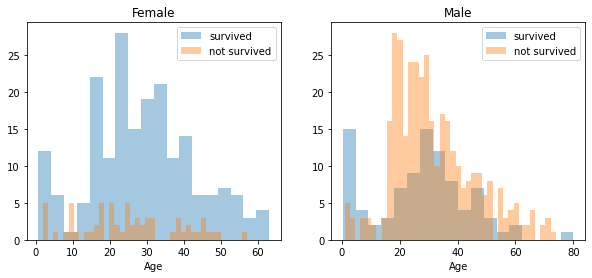

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be **certain ages, which have increased odds of survival** and because I want every feature to be roughly on the same scale, I will create age groups later on.

**3. Embarked, Pclass  and Sex:**

C:\Users\vimald\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


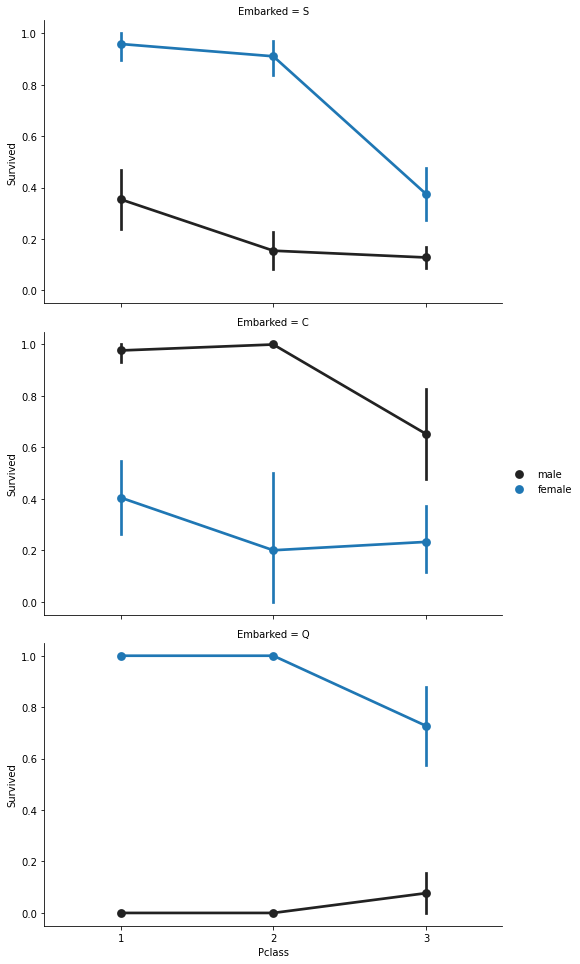

In [9]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender. 

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S. 

Pclass also seems to be correlated with survival. We will generate another plot of it below.

**4. Pclass:**

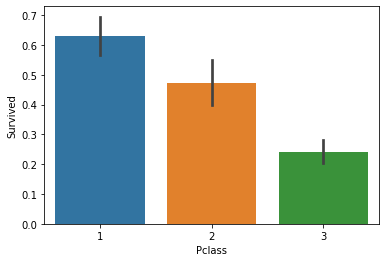

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

C:\Users\vimald\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


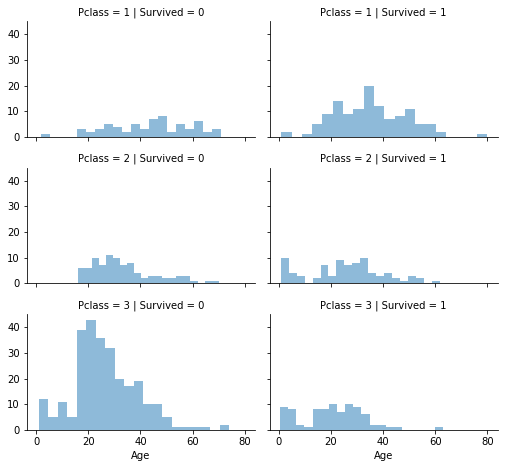

In [11]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

**5.  SibSp and Parch:**

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [12]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [13]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\vimald\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


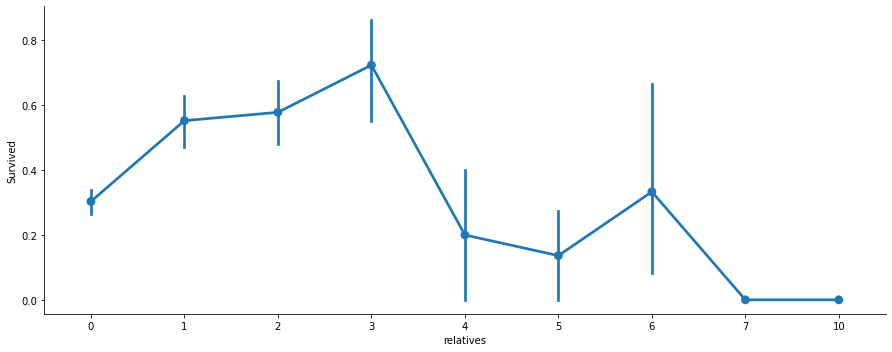

In [14]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

###  Store the Analysis results and training data info in S3

In [15]:
time = datetime.datetime.now().strftime("%Y-%m-%d#%H:%M:%S")
time

'2020-09-11#02:52:06'

In [16]:
trainingfile_metadata={
    "file_name" : "train_df" ,
    "features" : str(list(train_df.columns)),
     "file_size" : train_df.shape,
     "time_stamp" : time
      }
trainingfile_json_meta = json.dumps(trainingfile_metadata)

trainingfile_json_meta

'{"file_name": "train_df", "features": "[\'PassengerId\', \'Survived\', \'Pclass\', \'Name\', \'Sex\', \'Age\', \'SibSp\', \'Parch\', \'Ticket\', \'Fare\', \'Cabin\', \'Embarked\', \'relatives\', \'not_alone\']", "file_size": [891, 14], "time_stamp": "2020-09-11#02:52:06"}'

In [17]:
trainingfile_metadata

{'file_name': 'train_df',
 'features': "['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'relatives', 'not_alone']",
 'file_size': (891, 14),
 'time_stamp': '2020-09-11#02:52:06'}

In [35]:
bucket ='swire-datalake-dev-bucket'
path = "ml/metadata/classification/titanic/trainingfile_metadata"
file_name = 'trainingfile_info_'+ time +'.txt'
data = trainingfile_json_meta

key = path + "/" + file_name
#tags = 'Training_version={}&Trained_date={}'.format('V1', Tag_time)

def write_trainingfile_metadata_to_s3 (bucket,key,data): #,tags

    """
    store the training file info i.e shape, column names ,  file names
    
    """
    
    # Versioning 
    s3_resource = boto3.resource('s3')
    versioning = s3_resource.BucketVersioning(bucket)
    versioning.enable()
    # Put object
    s3_client = boto3.client('s3')
    response = s3_client.put_object(
                                    Bucket=bucket,
                                    Body=data,
                                    Key=key
                                    ) # Tagging=tags 
    
    return response

write_trainingfile_metadata_to_s3 (bucket,key,data)

{'ResponseMetadata': {'RequestId': 'B17257CEC96AB1CE',
  'HostId': 'l4xehHVZEY1RR7xmO/Fzl3IvYSHQgn3LW4eD1qJrvLRc3kxEOWC/xKt5kUxxCQM8UNwPos2ykQE=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'l4xehHVZEY1RR7xmO/Fzl3IvYSHQgn3LW4eD1qJrvLRc3kxEOWC/xKt5kUxxCQM8UNwPos2ykQE=',
   'x-amz-request-id': 'B17257CEC96AB1CE',
   'date': 'Thu, 10 Sep 2020 06:44:24 GMT',
   'x-amz-version-id': 'huNeuWjr75RU7xpJxoYB7JTA4a28U7RU',
   'etag': '"9707a4b30c3767204ea6d620e29668c6"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'ETag': '"9707a4b30c3767204ea6d620e29668c6"',
 'VersionId': 'huNeuWjr75RU7xpJxoYB7JTA4a28U7RU'}

## Save the Analysis metrics in the specified folder in S3

In [37]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  relatives  not_alone  
0      0         A/5 21171   7.2500   NaN        S          1          0  
1      0          PC 17599  71.2833   C85        C          1          0  
2      0  STON/O2. 3101282   7.9250   NaN        S          0          1  
3      0            113803  53.1000  C123        S          1          0  
4      0            373450   8.0500   NaN        S          0          1

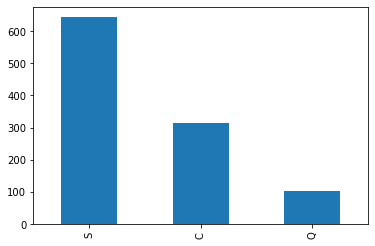

In [38]:
fig, ax = plt.subplots()
train_df["Fare"].value_counts().plot(kind='bar',ax=ax)
train_df["Sex"].value_counts().plot(kind='bar',ax=ax)
train_df["relatives"].value_counts().plot(kind='bar',ax=ax)
train_df["Embarked"].value_counts().plot(kind='bar',ax=ax)

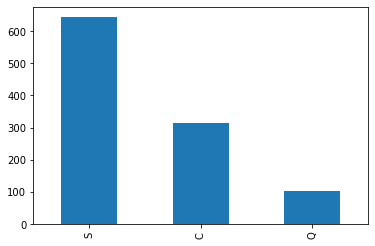

In [40]:
fig

In [41]:
bucket_name = "swire-datalake-dev-bucket"
filepath = "ml/metadata/classification/titanic/eda_results"
image_name = 'Embarked_feature.png'
filepath_withimage_name = filepath + "/" + image_name

Fig =  fig

In [42]:
#https://stackoverflow.com/questions/31485660/python-uploading-a-plot-from-memory-to-s3-using-matplotlib-and-boto
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvas
import boto3
import io

def write_image_to_s3 (Fig,bucket_name,filepath_withimage_name ):
    s3 = boto3.resource('s3')
    canvas = FigureCanvas(Fig) # renders figure onto canvas
    imdata = io.BytesIO() # prepares in-memory binary stream buffer (think of this as a txt file but purely in memory)
    canvas.print_png(imdata) # writes canvas object as a png file to the buffer. You can also use print_jpg, alternatively

    

    
    
    return s3.Object(bucket_name,filepath_withimage_name ).put(Body=imdata.getvalue(),ContentType='image/png') 



write_image_to_s3 (fig,bucket_name,filepath_withimage_name)

{'ResponseMetadata': {'RequestId': '322E42524ED156B0',
  'HostId': 'AS0XWzbXDEcsjf7ApcgCbzv6OBcpzT0Od7aMDNYN/HMO9yr44CpxIjLhibhQODDei15SL0VTQXg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'AS0XWzbXDEcsjf7ApcgCbzv6OBcpzT0Od7aMDNYN/HMO9yr44CpxIjLhibhQODDei15SL0VTQXg=',
   'x-amz-request-id': '322E42524ED156B0',
   'date': 'Thu, 10 Sep 2020 06:51:31 GMT',
   'x-amz-version-id': '_laZkLhI1LtXT_lOJSmSp110NwepgFCd',
   'etag': '"90664dee55bd265075699a9cced96fa7"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'ETag': '"90664dee55bd265075699a9cced96fa7"',
 'VersionId': '_laZkLhI1LtXT_lOJSmSp110NwepgFCd'}